In [1]:
!git clone https://github.com/VarunSivamani/Pytorch.git
%cd Pytorch/Unet/

Cloning into 'Pytorch'...
remote: Enumerating objects: 518, done.
remote: Counting objects: 100% (518/518), done.
remote: Compressing objects: 100% (475/475), done.
remote: Total 518 (delta 76), reused 462 (delta 25), pack-reused 0
Receiving objects: 100% (518/518), 17.04 MiB | 4.93 MiB/s, done.
Resolving deltas: 100% (76/76), done.
/content/Pytorch/Unet


In [2]:
!pip install -r requirements.txt --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.8/764.8 kB 53.3 MB/s eta 0:00:00


In [3]:
from main import *

100%|██████████| 791918971/791918971 [00:39<00:00, 19834090.49it/s]


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19173078/19173078 [00:02<00:00, 8721524.80it/s] 


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet


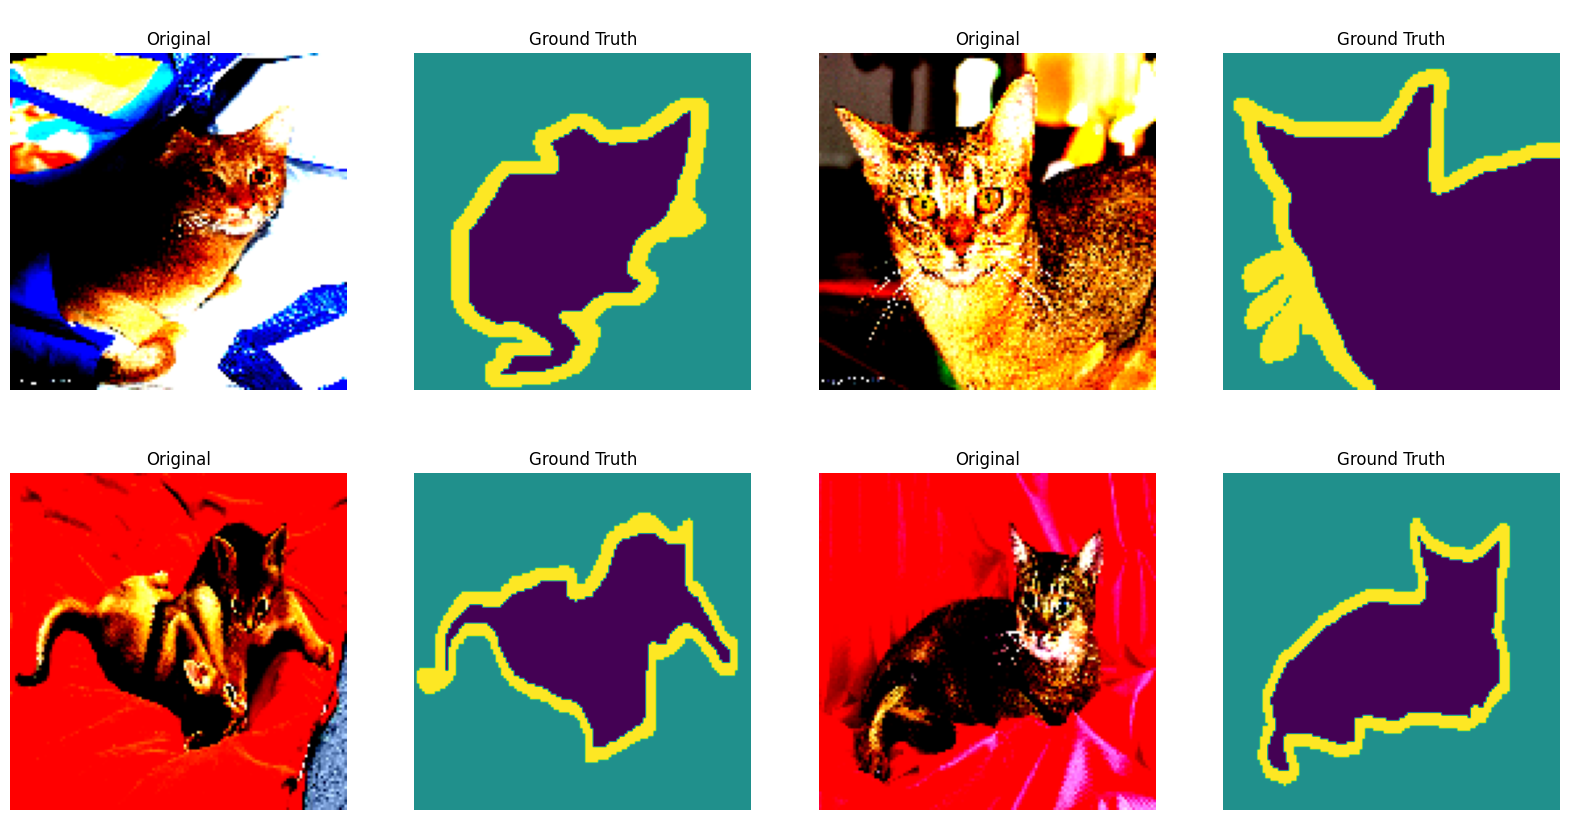

In [4]:
visualise_data(dm.train_ds)

In [5]:
unet_model = UNet(3, 3).to("cuda")
summary(unet_model, (3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           1,792
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
            Conv2d-4         [-1, 64, 128, 128]          36,928
       BatchNorm2d-5         [-1, 64, 128, 128]             128
              ReLU-6         [-1, 64, 128, 128]               0
         MaxPool2d-7           [-1, 64, 64, 64]               0
  ContractingBlock-8  [[-1, 64, 64, 64], [-1, 64, 128, 128]]               0
            Conv2d-9          [-1, 128, 64, 64]          73,856
      BatchNorm2d-10          [-1, 128, 64, 64]             256
             ReLU-11          [-1, 128, 64, 64]               0
           Conv2d-12          [-1, 128, 64, 64]         147,584
      BatchNorm2d-13          [-1, 128, 64, 64]             256
             ReLU-14      

# MP + TR + BCE

In [6]:
model_1 = UNETLitModel(
    in_channels=3,
    out_channels=3,
    pool="maxpool",
    mode="transpose",
    criterion="bce"
)

In [7]:
runner(model_1)

INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loading `train_dataloader` to estimate number of stepping batches.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type              | Params
----------------------------------------------
0 | net     | UNet              | 7.7 M 
1 | loss_fn | BCEWithLogitsLoss | 0     
----------------------------------------------
7.7 M     Trainable params
0         Non-trainable params
7.7 M     Total params
30.812    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Epoch: 1 | Loss:  0.58759
Epoch: 2 | Loss:  0.42438
Epoch: 3 | Loss:  0.32978
Epoch: 4 | Loss:  0.28077
Epoch: 5 | Loss:  0.25006
Epoch: 6 | Loss:  0.22575
Epoch: 7 | Loss:  0.20743
Epoch: 8 | Loss:  0.18635
Epoch: 9 | Loss:  0.17032
Epoch: 10 | Loss:  0.15721
Epoch: 11 | Loss:  0.15157
Epoch: 12 | Loss:  0.14662
Epoch: 13 | Loss:  0.14299
Epoch: 14 | Loss:  0.13954
Epoch: 15 | Loss:  0.13706


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


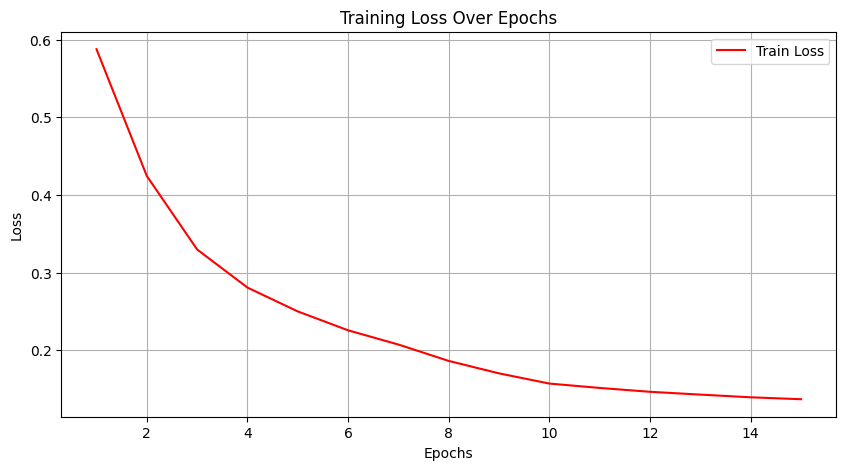

In [8]:
model_1.plot_train_loss()

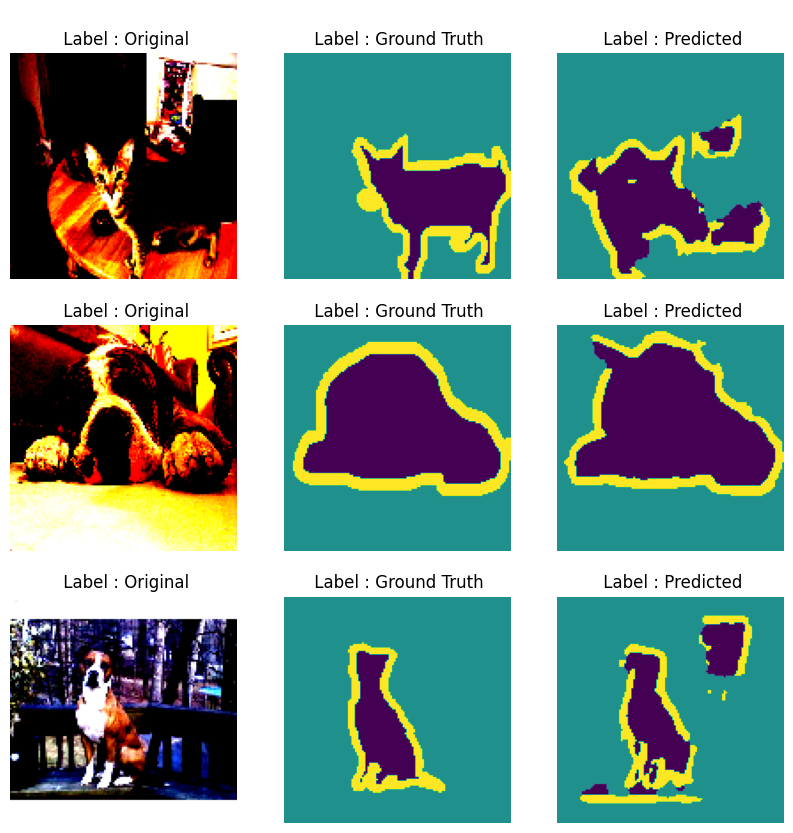

In [9]:
model_1 = model_1.to("cuda")
visualise_model_outputs(model_1, test_loader, 3)

# MP + TR + Dice Loss

In [10]:
model_2 = UNETLitModel(
    in_channels=3,
    out_channels=3,
    pool="maxpool",
    mode="transpose",
    criterion="dice"
)

In [11]:
runner(model_2)

INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loading `train_dataloader` to estimate number of stepping batches.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type     | Params
-------------------------------------
0 | net     | UNet     | 7.7 M 
1 | loss_fn | DiceLoss | 0     
-------------------------------------
7.7 M     Trainable params
0         Non-trainable params
7.7 M     Total params
30.812    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch: 1 | Loss:  -3.20352
Epoch: 2 | Loss:  1.56056
Epoch: 3 | Loss:  0.75644
Epoch: 4 | Loss:  0.84576
Epoch: 5 | Loss:  1.54749
Epoch: 6 | Loss:  0.52234
Epoch: 7 | Loss:  0.90663
Epoch: 8 | Loss:  0.01111
Epoch: 9 | Loss:  -0.08243
Epoch: 10 | Loss:  -0.25286
Epoch: 11 | Loss:  -0.46392
Epoch: 12 | Loss:  -0.82611
Epoch: 13 | Loss:  -1.46059
Epoch: 14 | Loss:  -2.35768
Epoch: 15 | Loss:  -5.13036


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


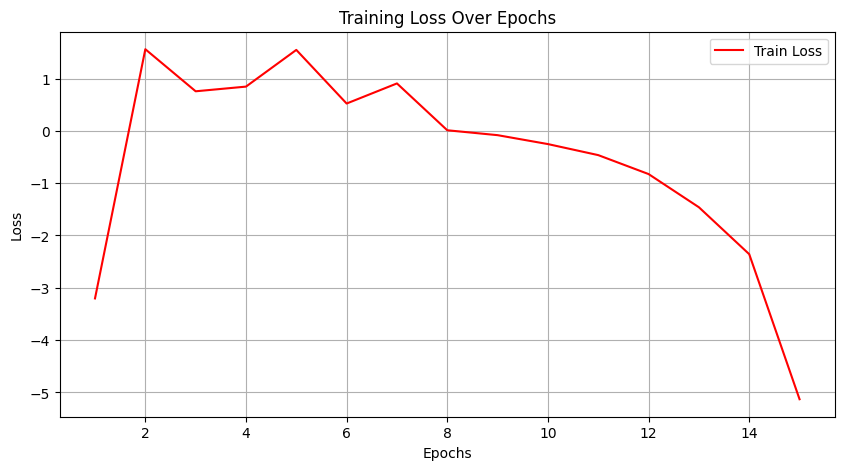

In [12]:
model_2.plot_train_loss()

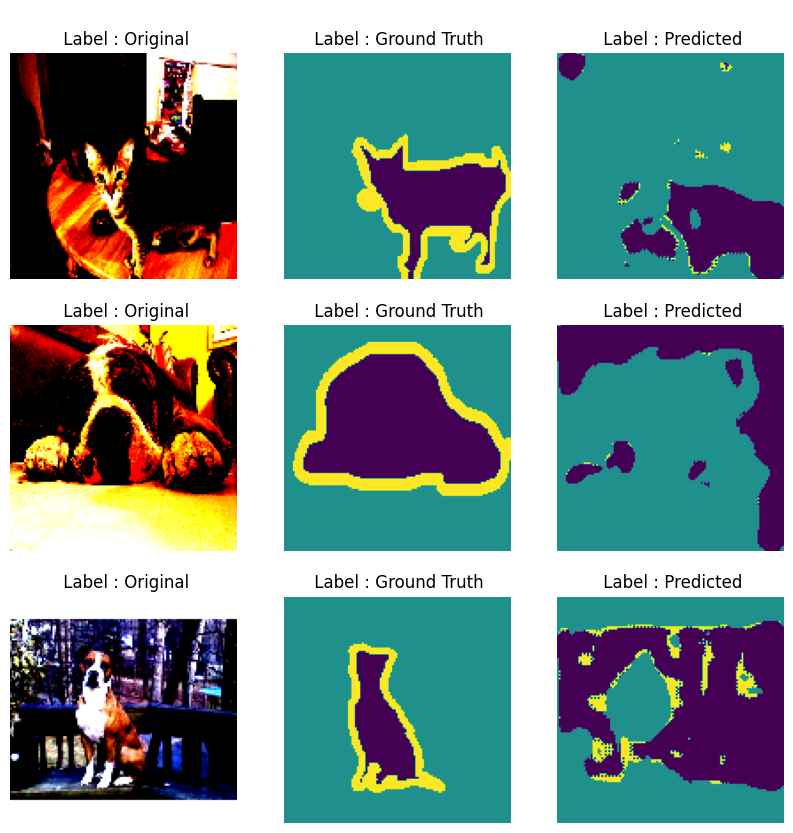

In [13]:
model_2 = model_2.to("cuda")
visualise_model_outputs(model_2, test_loader, 3)

# StrConv + TR + BCE

In [14]:
model_3 = UNETLitModel(
    in_channels=3,
    out_channels=3,
    pool="strided_conv",
    mode="transpose",
    criterion="bce"
)

In [15]:
runner(model_3)

INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loading `train_dataloader` to estimate number of stepping batches.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type              | Params
----------------------------------------------
0 | net     | UNet              | 9.1 M 
1 | loss_fn | BCEWithLogitsLoss | 0     
----------------------------------------------
9.1 M     Trainable params
0         Non-trainable params
9.1 M     Total params
36.387    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Epoch: 1 | Loss:  0.56813
Epoch: 2 | Loss:  0.4078
Epoch: 3 | Loss:  0.32518
Epoch: 4 | Loss:  0.28035
Epoch: 5 | Loss:  0.25482
Epoch: 6 | Loss:  0.22723
Epoch: 7 | Loss:  0.20872
Epoch: 8 | Loss:  0.19031
Epoch: 9 | Loss:  0.17333
Epoch: 10 | Loss:  0.16223
Epoch: 11 | Loss:  0.15604
Epoch: 12 | Loss:  0.15094
Epoch: 13 | Loss:  0.1468
Epoch: 14 | Loss:  0.14348
Epoch: 15 | Loss:  0.14149


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


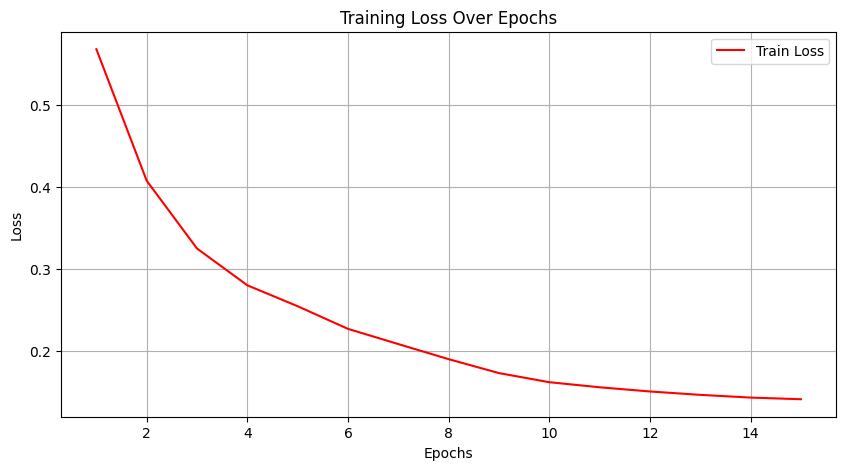

In [16]:
model_3.plot_train_loss()

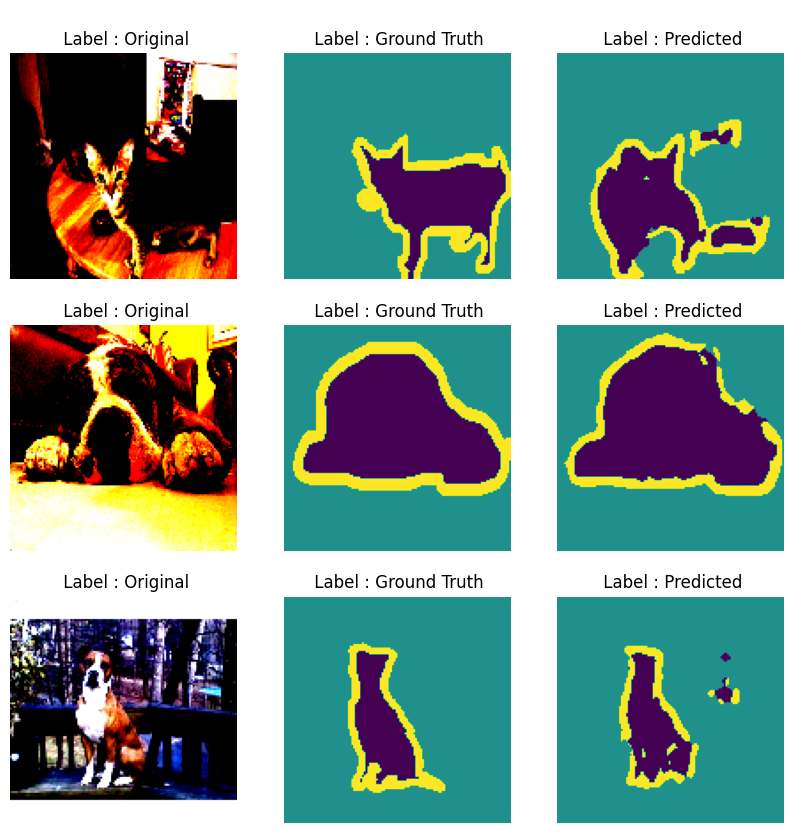

In [17]:
model_3 = model_3.to("cuda")
visualise_model_outputs(model_3, test_loader, 3)

# StrConv + Ups + Dice Loss

In [18]:
model_4 = UNETLitModel(
    in_channels=3,
    out_channels=3,
    pool="strided_conv",
    mode="upsample",
    criterion="dice"
)

In [19]:
runner(model_4)

INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loading `train_dataloader` to estimate number of stepping batches.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type     | Params
-------------------------------------
0 | net     | UNet     | 8.6 M 
1 | loss_fn | DiceLoss | 0     
-------------------------------------
8.6 M     Trainable params
0         Non-trainable params
8.6 M     Total params
34.322    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Epoch: 1 | Loss:  1.08778
Epoch: 2 | Loss:  4.01722
Epoch: 3 | Loss:  0.38583
Epoch: 4 | Loss:  -0.29335
Epoch: 5 | Loss:  0.32819
Epoch: 6 | Loss:  1.21456
Epoch: 7 | Loss:  0.99166
Epoch: 8 | Loss:  0.89833
Epoch: 9 | Loss:  0.8492
Epoch: 10 | Loss:  0.83117
Epoch: 11 | Loss:  0.81725
Epoch: 12 | Loss:  0.80635
Epoch: 13 | Loss:  0.79851
Epoch: 14 | Loss:  0.79171
Epoch: 15 | Loss:  0.78618


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


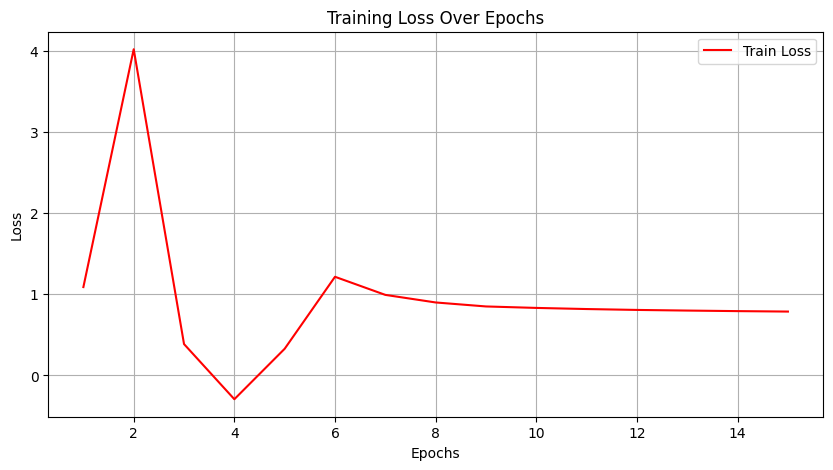

In [20]:
model_4.plot_train_loss()

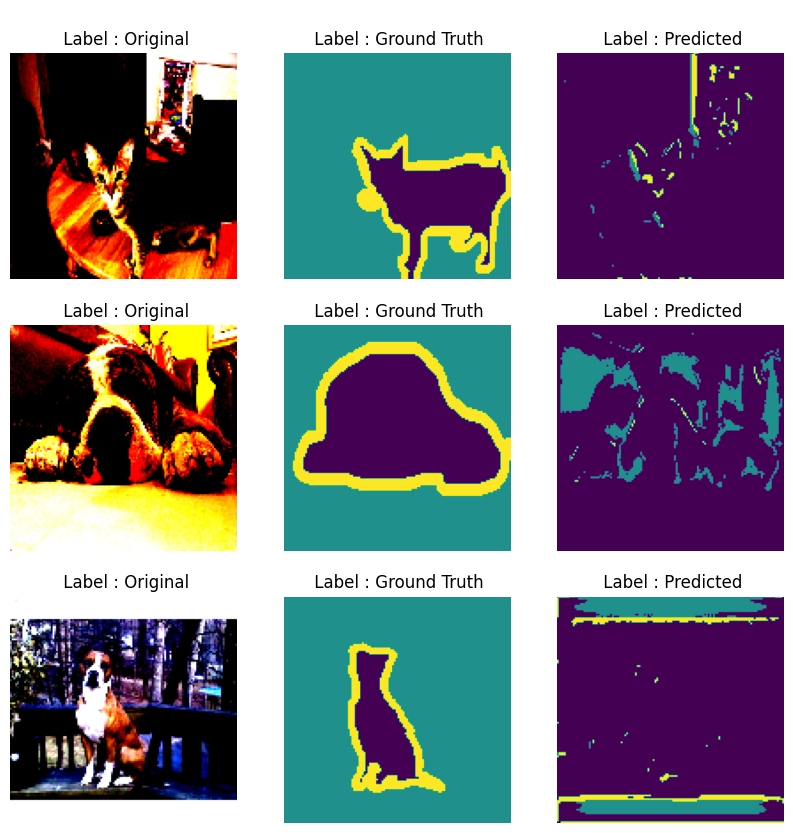

In [21]:
model_4 = model_4.to("cuda")
visualise_model_outputs(model_4, test_loader, 3)